In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir("/Users/sarahharith/Desktop/SmartBridge Internship/Projects/#7 Hospital Admission")
df1 = pd.read_csv('hospital_patients.csv')

In [2]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df1.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [4]:
df1 = df1.drop(columns = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'])
df1.head()

,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,1,?,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,3,?,?,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,2,?,?,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,2,?,?,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,?,?,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Cleaning and Churning

In [5]:
df1 = df1.replace('?', np.nan)

In [6]:
df1.apply(lambda x: sum(x.isnull()),axis = 0)

race                         2273
gender                          0
age                             0
weight                      98569
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [7]:
df1.shape

(101766, 45)

In [8]:
df1 = df1.drop(columns = ['weight', 'payer_code', 'medical_specialty'])
df1.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
df1.apply(lambda x: sum(x.isnull()),axis = 0)

race                        2273
gender                         0
age                            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide

In [10]:
df1["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [11]:
df1['race'].fillna('Caucasian', inplace = True)

In [12]:
df1.apply(lambda x: sum(x.isnull()),axis = 0)

race                           0
gender                         0
age                            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide

In [13]:
df1 = df1.replace(np.nan, 0)
df1.apply(lambda x: sum(x.isnull()),axis = 0)

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [14]:
df1.dtypes

race                        object
gender                      object
age                         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol            

In [15]:
df1.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


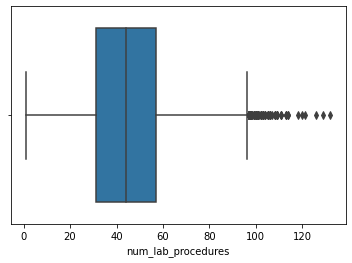

In [16]:
#Discover outliers with a visualization technique
import seaborn as sns
sns.boxplot(x = df1['num_lab_procedures'])

'time_in_hospital', 'num_lab_procedures',	'num_procedures',	'num_medications',	'number_outpatient',	'number_emergency',	'number_inpatient',	'number_diagnoses'

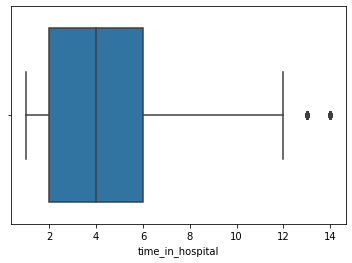

In [17]:
sns.boxplot(x = df1['time_in_hospital'])

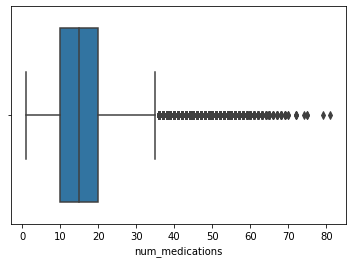

In [18]:
sns.boxplot(x = df1['num_medications'])

In [19]:
Q1 = df1[['time_in_hospital', 'num_lab_procedures',	'num_procedures',	'num_medications',	'number_outpatient',	'number_emergency',	'number_inpatient',	'number_diagnoses']].quantile(0.25)
Q3 = df1[['time_in_hospital', 'num_lab_procedures',	'num_procedures',	'num_medications',	'number_outpatient',	'number_emergency',	'number_inpatient',	'number_diagnoses']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

time_in_hospital       4.0
num_lab_procedures    26.0
num_procedures         2.0
num_medications       10.0
number_outpatient      0.0
number_emergency       0.0
number_inpatient       1.0
number_diagnoses       3.0
dtype: float64


In [20]:
data = df1[~((df1 < (Q1 - 1.5*IQR)) | (df1 >(Q3 + 1.5*IQR))).any(axis = 1)]
data.shape

(67284, 42)

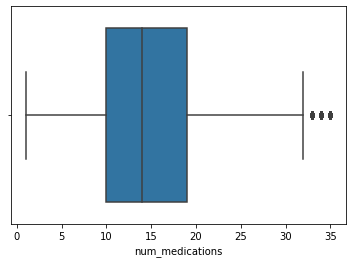

In [21]:
sns.boxplot(x = data['num_medications'])

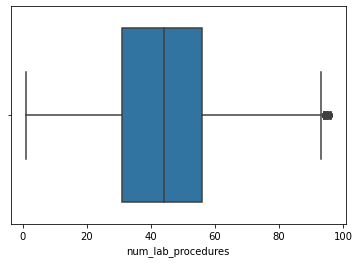

In [22]:
sns.boxplot(x = data['num_lab_procedures'])

# Exploratory Data Analysis

In [23]:
data["readmitted"].value_counts()

NO     39680
>30    21152
<30     6452
Name: readmitted, dtype: int64

In [24]:
data["age"].value_counts()

[70-80)     17291
[60-70)     14596
[80-90)     11591
[50-60)     11283
[40-50)      6345
[30-40)      2516
[90-100)     2053
[20-30)      1022
[10-20)       476
[0-10)        111
Name: age, dtype: int64

In [25]:
data.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [26]:
#data = data.drop(columns = ['insulin', 'num_medications', 'number_diagnoses', 'age', 'change', 'diabetesMed'])
data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,Caucasian,Male,[60-70),4,70,1,21,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),5,73,0,12,0,0,0,...,No,No,No,No,No,No,No,No,Yes,>30


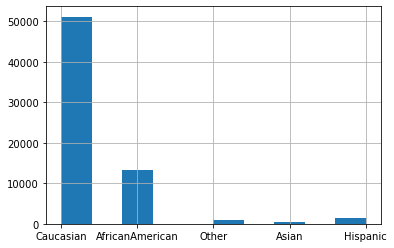

In [27]:
data['race'].hist(bins = 10)

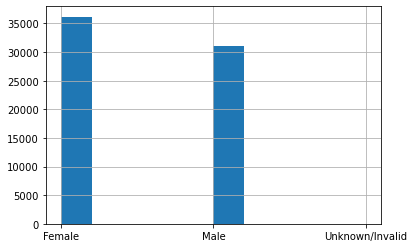

In [28]:
data['gender'].hist(bins = 10)

In [29]:
data['gender'] = data['gender'].replace('Unknown/Invalid', 'Female')

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


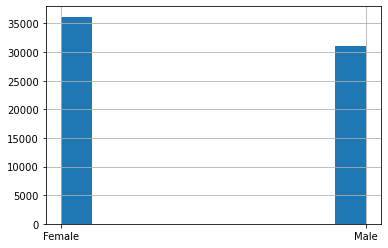

In [30]:
data['gender'].hist(bins = 10)

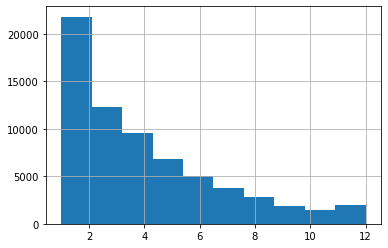

In [31]:
data['time_in_hospital'].hist(bins = 10)

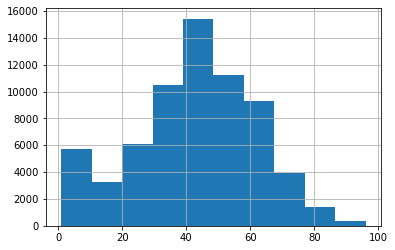

In [32]:
data['num_lab_procedures'].hist(bins = 10)

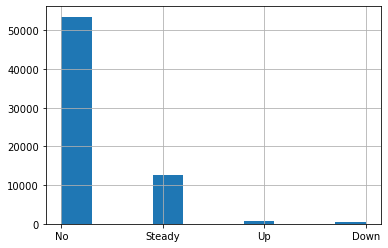

In [33]:
data['metformin'].hist(bins = 10)

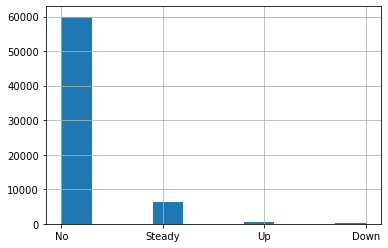

In [34]:
data['glyburide'].hist(bins = 10)

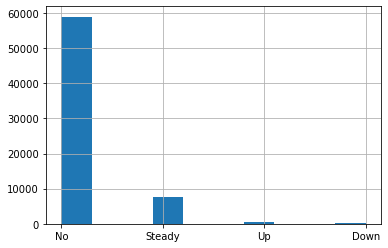

In [35]:
data['glipizide'].hist(bins = 10)

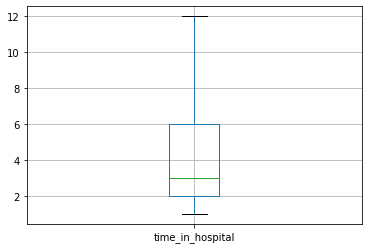

In [36]:
data.boxplot(column = 'time_in_hospital')

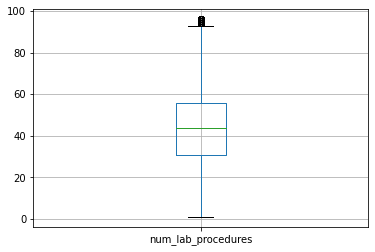

In [37]:
data.boxplot(column = 'num_lab_procedures')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95ccf51f10>,
      dtype=object)

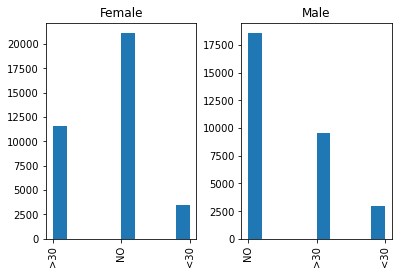

In [38]:
data.hist(column = "readmitted", by= "gender", bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95cd1c4bd0>,
      dtype=object)

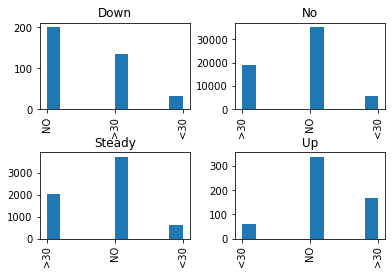

In [39]:
data.hist(column = "readmitted", by= "glyburide", bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95cafff050>,
      dtype=object)

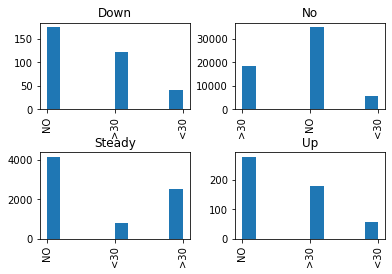

In [40]:
data.hist(column = "readmitted", by= "glipizide", bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95cd4e8e50>,
      dtype=object)

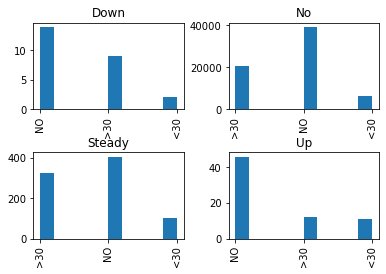

In [41]:
data.hist(column = "readmitted", by= "repaglinide", bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95cdb6c650>,
      dtype=object)

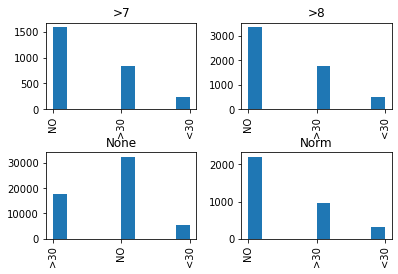

In [42]:
data.hist(column = "readmitted", by= "A1Cresult", bins = 10)

In [43]:
data.shape

(67284, 42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95cdc65e10>,
      dtype=object)

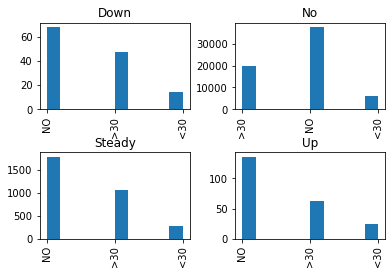

In [44]:
data.hist(column = "readmitted", by= "glimepiride", bins = 10)

In [45]:
data = data.drop(columns = ['number_outpatient', 'number_emergency'])
data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_1,diag_2,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,276,250.01,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,Caucasian,Male,[30-40),2,44,1,16,0,8,250.43,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,197,157,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
6,Caucasian,Male,[60-70),4,70,1,21,0,414,411,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),5,73,0,12,0,428,492,...,No,No,No,No,No,No,No,No,Yes,>30


In [46]:
data.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.290360,0.138286,0.411366,0.080703,0.212655
num_lab_procedures,0.290360,1.000000,-0.005523,0.207098,0.032010,0.127734
num_procedures,0.138286,-0.005523,1.000000,0.287357,-0.042522,0.043105
num_medications,0.411366,0.207098,0.287357,1.000000,0.064533,0.269863
number_inpatient,0.080703,0.032010,-0.042522,0.064533,1.000000,0.101228
number_diagnoses,0.212655,0.127734,0.043105,0.269863,0.101228,1.000000


# Encoding

In [47]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['gender']= label_encoder.fit_transform(data['gender']) 
  
data['gender'].unique() 
#Female = 0, Male = 1

array([0, 1])

In [48]:
data['readmitted']= label_encoder.fit_transform(data['readmitted']) 
data['readmitted'].unique() 

array([1, 2, 0])

In [49]:
data['glyburide']= label_encoder.fit_transform(data['glyburide']) 
  
data['glyburide'].unique() 

array([1, 2, 3, 0])

In [50]:
data['glipizide']= label_encoder.fit_transform(data['glipizide']) 
  
data['glipizide'].unique()

array([1, 2, 3, 0])

In [51]:
data['A1Cresult']= label_encoder.fit_transform(data['A1Cresult']) 
  
data['A1Cresult'].unique()

array([2, 0, 1, 3])

In [52]:
data['glimepiride']= label_encoder.fit_transform(data['glimepiride']) 
  
data['glimepiride'].unique()

array([1, 2, 0, 3])

In [53]:
data['repaglinide']= label_encoder.fit_transform(data['repaglinide']) 
  
data['repaglinide'].unique()

array([1, 2, 3, 0])

In [54]:
data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient,diag_1,diag_2,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,0,[10-20),3,59,0,18,0,276,250.01,...,No,Up,No,No,No,No,No,Ch,Yes,1
3,Caucasian,1,[30-40),2,44,1,16,0,8,250.43,...,No,Up,No,No,No,No,No,Ch,Yes,2
4,Caucasian,1,[40-50),1,51,0,8,0,197,157,...,No,Steady,No,No,No,No,No,Ch,Yes,2
6,Caucasian,1,[60-70),4,70,1,21,0,414,411,...,No,Steady,No,No,No,No,No,Ch,Yes,2
7,Caucasian,1,[70-80),5,73,0,12,0,428,492,...,No,No,No,No,No,No,No,No,Yes,1


# ANN Classifier

In [55]:
x = data[['gender', 'time_in_hospital', 'num_lab_procedures', 'glyburide', 'glipizide', 'glimepiride','A1Cresult', 'repaglinide']]
x

,gender,time_in_hospital,num_lab_procedures,glyburide,glipizide,glimepiride,A1Cresult,repaglinide
1,0,3,59,1,1,1,2,1
3,1,2,44,1,1,1,2,1
4,1,1,51,1,2,1,2,1
6,1,4,70,1,1,2,2,1
7,1,5,73,2,1,1,2,1
...,...,...,...,...,...,...,...,...
101757,0,5,21,1,1,1,2,1
101761,1,3,51,1,1,1,1,1
101762,0,5,33,1,1,1,2,1
101764,0,10,45,1,2,1,2,1


In [56]:
x = x.values
x

array([[ 0,  3, 59, ...,  1,  2,  1],
       [ 1,  2, 44, ...,  1,  2,  1],
       [ 1,  1, 51, ...,  1,  2,  1],
       ...,
       [ 0,  5, 33, ...,  1,  2,  1],
       [ 0, 10, 45, ...,  1,  2,  1],
       [ 1,  6, 13, ...,  1,  2,  1]])

In [57]:
y = data.iloc[:,-1].values
from keras.utils import np_utils
y = np_utils.to_categorical(y)
y.shape

Using TensorFlow backend.


(67284, 3)

# Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
print(y)
print(x)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[-0.92720089 -0.41658745  0.86227331 ... -0.21011647  0.20947383
  -0.10921222]
 [ 1.07851493 -0.79895796  0.07992543 ... -0.21011647  0.20947383
  -0.10921222]
 [ 1.07851493 -1.18132846  0.44502111 ... -0.21011647  0.20947383
  -0.10921222]
 ...
 [-0.92720089  0.34815356 -0.49379634 ... -0.21011647  0.20947383
  -0.10921222]
 [-0.92720089  2.26000609  0.13208196 ... -0.21011647  0.20947383
  -0.10921222]
 [ 1.07851493  0.73052407 -1.53692685 ... -0.21011647  0.20947383
  -0.10921222]]


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [61]:
model = Sequential()

In [62]:
print('x_train shape = ', x_train.shape)
print('y_train shape = ', y_train.shape)

x_train shape =  (53827, 8)
y_train shape =  (53827, 3)


In [63]:
#input Layer
model.add(Dense(input_dim = 8, init = 'uniform',activation = 'relu', output_dim = 30)) 

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=8, activation="relu", units=30, kernel_initializer="uniform")`
  


In [64]:
#Hidden Layer 1
model.add(Dense(output_dim = 10, init = 'uniform',activation = 'relu'))

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  


In [65]:
#Hidden Layer 2
model.add(Dense(output_dim = 7, init = 'uniform',activation = 'relu'))

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  


In [66]:
#Hidden Layer 3
model.add(Dense(output_dim = 10, init = 'uniform',activation = 'relu'))

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  


In [67]:
#Hidden Layer 4
model.add(Dense(output_dim = 4, init = 'uniform',activation = 'relu'))

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  


In [68]:
#Output Layer
model.add(Dense(output_dim = 3, init = 'uniform', activation = 'softmax'))

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=3, kernel_initializer="uniform")`
  


In [69]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'mse'])

In [70]:
model.fit(x_train, y_train, epochs = 50, batch_size = 15)

Epoch 1/50
53827/53827 [==============================] - 8s 151us/step - loss: 0.9027 - accuracy: 0.5902 - mse: 0.1818
Epoch 2/50
53827/53827 [==============================] - 7s 133us/step - loss: 0.8968 - accuracy: 0.5903 - mse: 0.1806
Epoch 3/50
53827/53827 [==============================] - 7s 131us/step - loss: 0.8965 - accuracy: 0.5903 - mse: 0.1806
Epoch 4/50
53827/53827 [==============================] - 7s 129us/step - loss: 0.8962 - accuracy: 0.5903 - mse: 0.1805
Epoch 5/50
53827/53827 [==============================] - 7s 131us/step - loss: 0.8961 - accuracy: 0.5903 - mse: 0.1805
Epoch 6/50
53827/53827 [==============================] - 7s 132us/step - loss: 0.8961 - accuracy: 0.5903 - mse: 0.1805
Epoch 7/50
53827/53827 [==============================] - 7s 131us/step - loss: 0.8961 - accuracy: 0.5903 - mse: 0.1805
Epoch 8/50
53827/53827 [==============================] - 7s 134us/step - loss: 0.8959 - accuracy: 0.5903 - mse: 0.1805
Epoch 9/50
53827/53827 [================

from sklearn.model_selection import cross_val_score

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import KFold

estimator = KerasClassifier(build_fn=baseline_model(), epochs=50, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True)

results = cross_val_score(estimator, x, y, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [71]:
y_pred = model.predict(x_test)
y_pred

array([[0.1145719 , 0.3411756 , 0.5442525 ],
       [0.12024578, 0.35639933, 0.5233549 ],
       [0.11351994, 0.33838966, 0.54809034],
       ...,
       [0.07865857, 0.29255277, 0.62878865],
       [0.10057876, 0.3210777 , 0.5783436 ],
       [0.05699776, 0.2563942 , 0.686608  ]], dtype=float32)

In [72]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [75]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=8, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [95]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
estimator = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=15, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 59.01% (0.78%)


# Logistic Regression

In [77]:
x = data[['gender', 'time_in_hospital', 'num_lab_procedures', 'glyburide', 'glipizide', 'glimepiride','A1Cresult', 'repaglinide']]
y = data.iloc[:,-1].values

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
print(y)
print(x)

[1 2 2 ... 2 2 2]
[[-0.92720089 -0.41658745  0.86227331 ... -0.21011647  0.20947383
  -0.10921222]
 [ 1.07851493 -0.79895796  0.07992543 ... -0.21011647  0.20947383
  -0.10921222]
 [ 1.07851493 -1.18132846  0.44502111 ... -0.21011647  0.20947383
  -0.10921222]
 ...
 [-0.92720089  0.34815356 -0.49379634 ... -0.21011647  0.20947383
  -0.10921222]
 [-0.92720089  2.26000609  0.13208196 ... -0.21011647  0.20947383
  -0.10921222]
 [ 1.07851493  0.73052407 -1.53692685 ... -0.21011647  0.20947383
  -0.10921222]]


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [80]:
from sklearn.linear_model.logistic import LogisticRegression

cls = LogisticRegression(random_state=0)
lr_cls = cls.fit(x_train,y_train)

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [81]:
lr_y_test = lr_cls.predict(x_test)

In [82]:
print("Actual Readmission: ")
print(y_test)

Actual Readmission: 
[2 1 2 ... 2 2 2]


In [83]:
print("Predicted Readmission: ")
print(lr_y_test)

Predicted Readmission: 
[2 2 2 ... 2 2 2]


In [84]:
lr_y_train = lr_cls.predict(x_train)
lr_y_train

array([2, 2, 2, ..., 2, 2, 2])

In [85]:
y_train

array([0, 2, 1, ..., 2, 2, 1])

In [86]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("Accuracy Score: %f"%(accuracy_score(y_test,lr_y_test) * 100))
print(confusion_matrix(y_test, lr_y_test))

Accuracy Score: 58.742662
[[   0    0 1297]
 [   0    0 4253]
 [   0    2 7905]]


In [87]:
from sklearn.model_selection import cross_val_score, cross_val_predict
lr_acc = cross_val_score(lr_cls, x_train, y_train, cv = 3, scoring = 'accuracy', n_jobs = -1)
lr_proba = cross_val_predict(lr_cls, x_train, y_train, cv = 3, method = 'predict_proba')
lr_scores = lr_proba[:,1]

In [88]:
lr_acc

array([0.5903695 , 0.59034667, 0.58978932])

In [89]:
lr_y_train = lr_cls.predict(x_train)

In [90]:
lr_accu_train = accuracy_score(y_train, lr_y_train)
lr_accu_train

0.5902799710182622

In [91]:
lr_accu_test = accuracy_score(y_test, lr_y_test)
lr_accu_test

0.5874266181169652

In [92]:
#precision score on train and test data
from sklearn.metrics import precision_score
lr_precision_test = precision_score(y_test, lr_y_test, average = 'weighted')
print(lr_precision_test)
lr_precision_train = precision_score(y_train, lr_y_train, average = 'weighted')
print(lr_precision_train)

0.34520864135643575
0.4381538976776456


/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
